<a href="https://colab.research.google.com/github/Danielperez471/Simulacion/blob/main/UNIDAD3/Ejercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problema 1: Distribución Binomial

###Facilitador: José Gabriel Rodríguez Rivas
###Alumno: Daniel Alonso Perez Macias

Contexto: Un distribuidor de artículos electrónicos recibe varios pedidos
diarios. Cada día, el distribuidor tiene una probabilidad de éxito de cumplir
un pedido (es decir, de tener en stock los artículos solicitados) del 70%.
Desea simular la cantidad de pedidos diarios que logra satisfacer para
gestionar adecuadamente sus inventarios y minimizar las faltantes de
stock.
Objetivo: Generar una variable aleatoria que simule el número de pedidos
satisfechos por día durante una semana, considerando que cada día el
distribuidor recibe 20 pedidos

Número de pedidos satisfechos cada día de la semana:
[16, 14, 16, 15, 16, 13, 13]


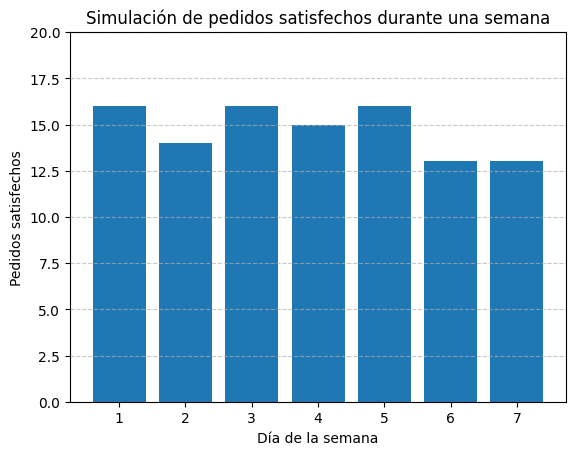

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb

# Parámetros de la distribución binomial según el problema
n = 20      # Número de pedidos diarios
p = 0.70    # Probabilidad de éxito
dias_semana = 7  # Simular una semana

# Generar números aleatorios uniformes U ~ Uniform(0, 1)
U = np.random.uniform(0, 1, dias_semana)

# Función de distribución de probabilidad de la binomial
def binomial_pmf(n, k, p):
    return comb(n, k) * (p**k) * ((1 - p)**(n - k))

# Función para la transformada inversa
def binomial_inverse_transform(n, p, U):
    F_k = 0  # Inicializamos la FDA
    k = 0
    while True:
        F_k += binomial_pmf(n, k, p)  # Sumamos la probabilidad hasta que F(k) >= U
        if U <= F_k:
            return k  # Este valor de k es el número de pedidos satisfechos
        k += 1

# Generar la cantidad de pedidos satisfechos cada día de la semana
pedidos_satisfechos = [binomial_inverse_transform(n, p, u) for u in U]

# Mostrar resultados
print("Número de pedidos satisfechos cada día de la semana:")
print(pedidos_satisfechos)

# Graficar los resultados
plt.bar(range(1, dias_semana+1), pedidos_satisfechos)
plt.title("Simulación de pedidos satisfechos durante una semana")
plt.xlabel("Día de la semana")
plt.ylabel("Pedidos satisfechos")
plt.xticks(range(1, dias_semana+1))
plt.ylim(0, n)  # El máximo posible es n (20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#CONCLUSION
Con la simulación binomial, el distribuidor puede predecir cuántos pedidos cumplirá diariamente con un 70% de probabilidad de éxito. Los resultados muestran fluctuaciones normales (algunos días con más o menos pedidos satisfechos), lo que ayuda a gestionar mejor el inventario y reducir faltantes.